<a href="https://colab.research.google.com/github/cagutierrezgu/My_Portfolio/blob/main/Car%20prices%20analysis/Analysis/Linear_regressions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data analysis

### Regresiones lineales

A partir del mapa de calor realizado anteriormente, es posible realizar una regresión lineal entre las variables *highway_mpg* y *city_mpg*, ya que parecían altamente correlacionadas:

In [ ]:
x = df_clean['highway_mpg']
y = df_clean['city_mpg']
slope, intercept, correlation, p_valor, error_std = stats.linregress(x, y)
print(f'''Pendiente: {slope} \nIntercepto: {intercept} \nCoeficiente de correlación: {correlation}
P_valor: {p_valor} \nError de la pendiente: {error_std}''')

Pendiente: 0.8993166901974002 
Intercepto: -4.222280131304071 
Coeficiente de correlación: 0.8868294962591354
P_valor: 0.0 
Error de la pendiente: 0.004293516483158451


Lo anterior deja una relación funcional entre estas variables expresada de la siguiente manera:

\begin{equation}
    y = 0.899x - 4.222
\end{equation}

con $y$ la variable *city_mpg* y $x$ la variable *highway_mpg*; además se tiene un coeficiente de correlación de Pearson de 0.887.

Sin embargo, veamos ahora una gráfica tipo *scatter* entre estas dos variables estudiadas:

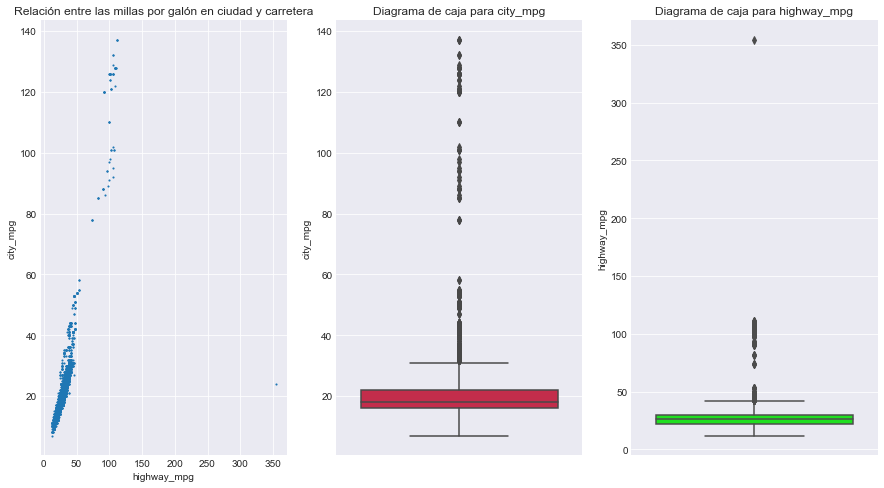

In [ ]:
fig1, ax = plt.subplots(1, 3, figsize=(15,8))
ax[0].scatter(df_clean['highway_mpg'], df_clean['city_mpg'], s=1.2);
sns.boxplot(ax = ax[1], data = df_clean, y = 'city_mpg', color = 'crimson');
sns.boxplot(ax = ax[2], data = df_clean, y = 'highway_mpg', color = 'lime');
ax[0].set_title('Relación entre las millas por galón en ciudad y carretera')
ax[1].set_title('Diagrama de caja para city_mpg')
ax[2].set_title('Diagrama de caja para highway_mpg')
ax[0].set_xlabel('highway_mpg'); ax[0].set_ylabel('city_mpg');

Gráficas que deja ver valores atípicos que estarían afectando la clara relación lineal que guardan estas dos variables, luego es posible hacer una limpieza para eliminar algunos datos en una copia del dataframe original usando la función *outliers* ya definida:

In [ ]:
df_mpg = df_clean.copy()

print("Old Shape: ", df_mpg.shape)
 
outliers(df_mpg, 'highway_mpg')
outliers(df_mpg, 'city_mpg')
 
print("New Shape: ", df_mpg.shape)

Old Shape:  (11914, 15)
New Shape:  (11668, 15)


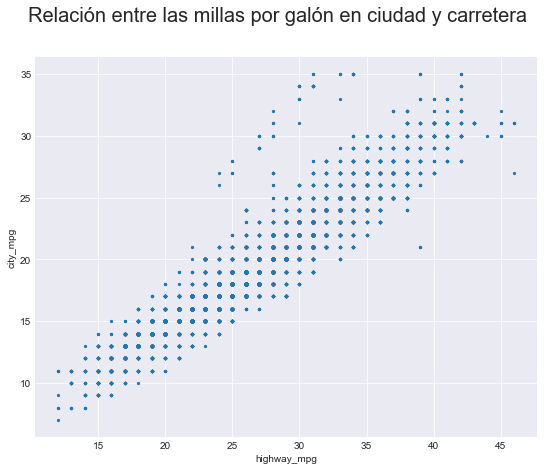

In [ ]:
plt.figure(figsize=(9,7))
plt.scatter(df_mpg['highway_mpg'], df_mpg['city_mpg'], s=5);
plt.suptitle('Relación entre las millas por galón en ciudad y carretera', fontsize = 20)
plt.xlabel('highway_mpg'); plt.ylabel('city_mpg');

Así que realizando la regresión lineal sobre estos nuevos datos se obtiene:

In [ ]:
x = df_mpg['highway_mpg']
y = df_mpg['city_mpg']
slope, intercept, correlation, p_valor, error_std = stats.linregress(x, y)
slope = round(slope, 2); intercept = round(intercept, 2)
print(f'''Pendiente: {slope} \nIntercepto: {intercept} \nCoeficiente de correlación: {correlation}
P_valor: {p_valor} \nError de la pendiente: {error_std}''')

Pendiente: 0.74 
Intercepto: -0.23 
Coeficiente de correlación: 0.9382391920145333
P_valor: 0.0 
Error de la pendiente: 0.00250944890665671


En este caso el nuevo ajuste lineal será de la forma:

\begin{equation}
    y = 0.735x - 0.228
\end{equation}

Y el coeficiente de correlación ha aumentado de 0.887 a 0.938, mostrando mejores resultados tras eliminar los outliers. Además, puede usarse el método *seaborn.lmplot* de la librería *seaborn* para visualizar esta regresión:

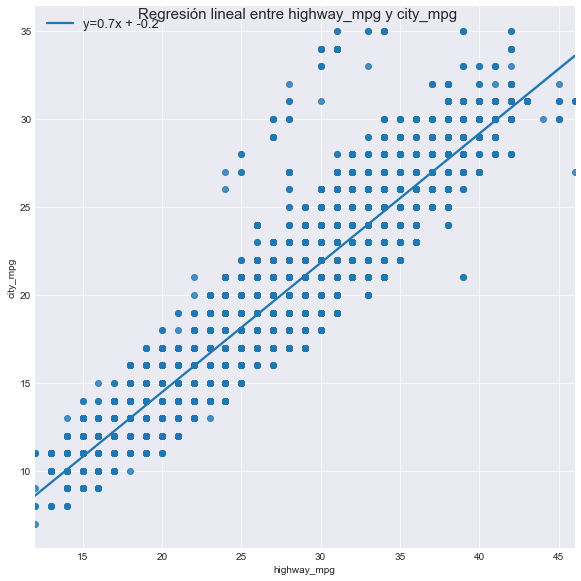

In [ ]:
sns.lmplot(x='highway_mpg',y='city_mpg',data=df_mpg,line_kws={'label':"y={0:.1f}x + {1:.1f}".format(slope,intercept)},height=8)
plt.legend(fontsize = 13);
plt.suptitle('Regresión lineal entre highway_mpg y city_mpg', fontsize = 15);

El otro conjunto de variables que guardaban una correlación considerable eran *engine_cylinders* y *engine_hp*, así que podría realizarse un procedimiento similar al anterior para observar como es su ajuste. Al graficar la relación entre las variables se puede notar:

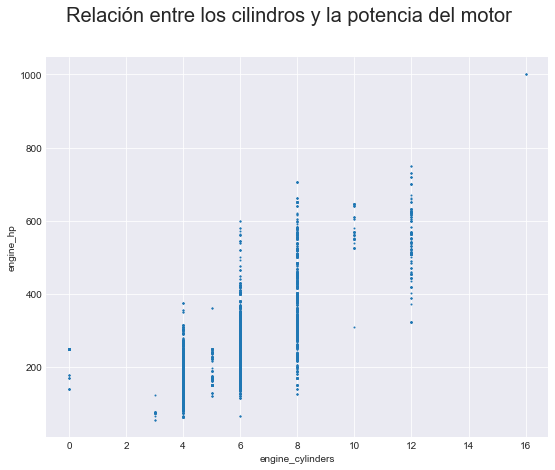

In [ ]:
plt.figure(figsize=(9,7))
plt.scatter(df_clean['engine_cylinders'], df_clean['engine_hp'], s=1);
plt.suptitle('Relación entre los cilindros y la potencia del motor', fontsize = 20)
plt.xlabel('engine_cylinders'); plt.ylabel('engine_hp');

En la cual se observa que una de las variables es discreta, mas no continua como ocurría en el caso de las millas por galón, así que una regresión lineal no daría los mejores resultados predictivos acerca de la relación entre estas dos características.

Una de las predicciones más interesantes de realizar es la del precio de un respectivo vehículo según una caractéristica determinada de este, así que a continuación se muestran los coeficientes de correlación de las variables numéricas con la variable *msrp*:

In [ ]:
df_clean.corr()['msrp'].sort_values()[::-1] 

msrp                1.000000
engine_hp           0.661641
engine_cylinders    0.531139
year                0.227590
popularity         -0.048476
number_of_doors    -0.126081
city_mpg           -0.157676
highway_mpg        -0.160043
Name: msrp, dtype: float64

Por lo tanto, vale la pena hacer una regresión lineal entre *msrp* y algunas de las características con las que más se correlaciona, por ejemplo *engine_hp* y *year*:

In [ ]:
x = df_clean['engine_hp']
y = df_clean['msrp']
slope, intercept, correlation, p_valor, error_std = stats.linregress(x, y)
print(f'''Pendiente: {slope} \nIntercepto: {intercept} \nCoeficiente de correlación: {correlation}
P_valor: {p_valor} \nError de la pendiente: {error_std}''')

Pendiente: 365.2867901879133 
Intercepto: -50501.88326741064 
Coeficiente de correlación: 0.6616413888939616
P_valor: 0.0 
Error de la pendiente: 3.792942226042996


Es decir, la función que relaciona estas dos variables es:

\begin{equation}
    y = 365x - 50501
\end{equation}

donde *y* corresponde a la columna *msrp* y *engine_hp* está referido con la variable *x*.

Por otro lado, siempre es útil ver la representación gráfica de estas variables para obtener mayor información:

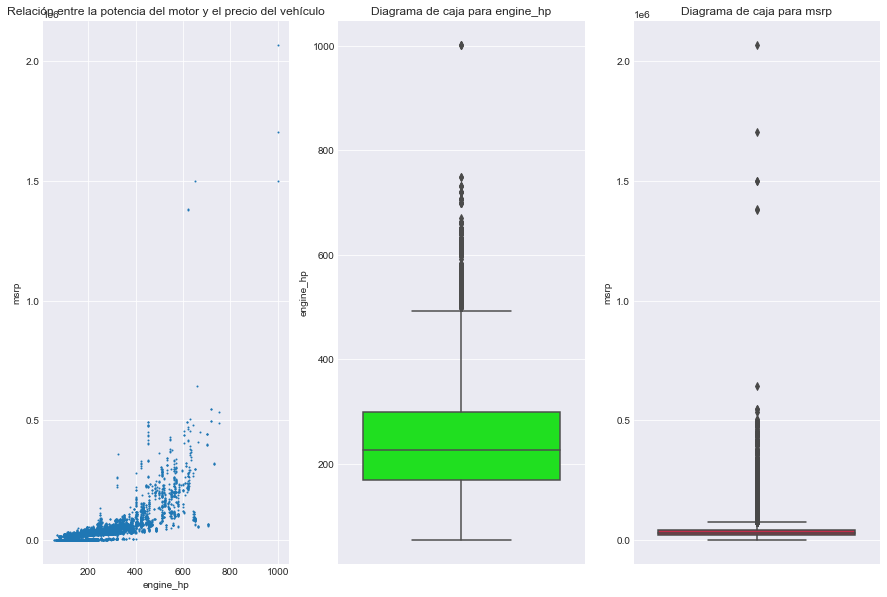

In [ ]:
fig2, ax = plt.subplots(1, 3, figsize=(15,10))
ax[0].scatter(df_clean['engine_hp'], df_clean['msrp'], s=1);
sns.boxplot(ax = ax[1], data = df_clean, y = 'engine_hp', color = 'lime');
sns.boxplot(ax = ax[2], data = df_clean, y = 'msrp', color = 'crimson');
ax[0].set_title('Relación entre la potencia del motor y el precio del vehículo')
ax[1].set_title('Diagrama de caja para engine_hp')
ax[2].set_title('Diagrama de caja para msrp')
ax[0].set_xlabel('engine_hp'); ax[0].set_ylabel('msrp');

Luego también se hace necesario remover outliers, ya que se observan puntos bastante alejados del resto de la distribución:

In [ ]:
df_msrp = df_clean.copy()

print("Old Shape: ", df_msrp.shape)
 
outliers(df_msrp, 'engine_hp')
outliers(df_msrp, 'msrp')
 
print("New Shape: ", df_msrp.shape)

Old Shape:  (11914, 15)
New Shape:  (11449, 15)


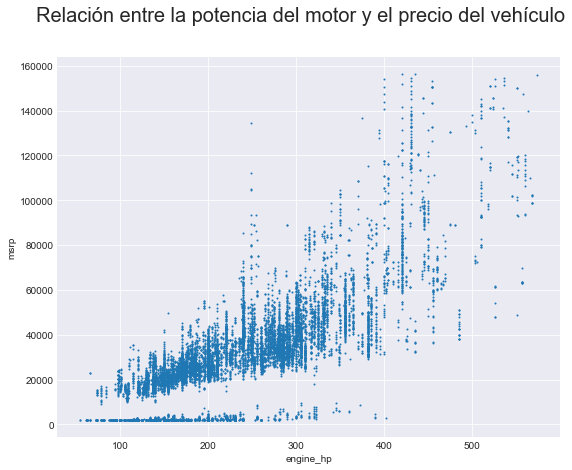

In [ ]:
plt.figure(figsize=(9,7))
plt.scatter(df_msrp['engine_hp'], df_msrp['msrp'], s=1);
plt.suptitle('Relación entre la potencia del motor y el precio del vehículo', fontsize = 20)
plt.xlabel('engine_hp'); plt.ylabel('msrp');

Que al realizarle una regresión lineal deja como resultado:

In [ ]:
x = df_msrp['engine_hp']
y = df_msrp['msrp']
slope, intercept, correlation, p_valor, error_std = stats.linregress(x, y)
slope = round(slope); intercept = round(intercept)
print(f'''Pendiente: {slope} \nIntercepto: {intercept} \nCoeficiente de correlación: {correlation}
P_valor: {p_valor} \nError de la pendiente: {error_std}''')

Pendiente: 196 
Intercepto: -14348 
Coeficiente de correlación: 0.778360079379043
P_valor: 0.0 
Error de la pendiente: 1.4787378551512729


Esto corresponde a la siguiente relación lineal entre las dos variables estudiadas:

\begin{equation}
    y = 196x - 14348
\end{equation}

además, se presenta un aumento considerable del coeficiente de correlación, de 0.662 a 0.778 reforzando la idea de que existe una relación de este tipo entre el precio del vehículo y los caballos de fuerza del mismo. Dicha regresión realizada puede observarse en la siguiente figura:

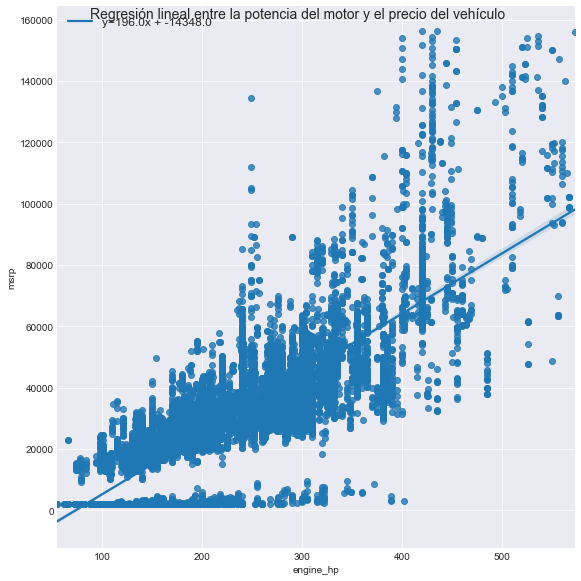

In [ ]:
sns.lmplot(x='engine_hp',y='msrp',data=df_msrp,line_kws={'label':"y={0:.1f}x + {1:.1f}".format(slope,intercept)},height=8)
plt.legend(fontsize = 12);
plt.suptitle('Regresión lineal entre la potencia del motor y el precio del vehículo', fontsize = 14);

En el caso de la relación entre el precio del vehículo y su año de lanzamiento se tiene:

In [ ]:
x = df_clean['year']
y = df_clean['msrp']
slope, intercept, correlation, p_valor, error_std = stats.linregress(x, y)
print(f'''Pendiente: {slope} \nIntercepto: {intercept} \nCoeficiente de correlación: {correlation}
P_valor: {p_valor} \nError de la pendiente: {error_std}''')

Pendiente: 1804.83788168174 
Intercepto: -3587823.072485839 
Coeficiente de correlación: 0.2275895141047345
P_valor: 8.520188245563858e-140 
Error de la pendiente: 70.75290440013929


Luego la función que relaciona estas características es:

\begin{equation}
    y = 1804x - 3587823
\end{equation}

donde *y* es el precio del vehículo y *engine_hp* se representa con *x*. Nuevamente veamos una gráfica de dispersión entre estas dos variables para obtener información adicional:

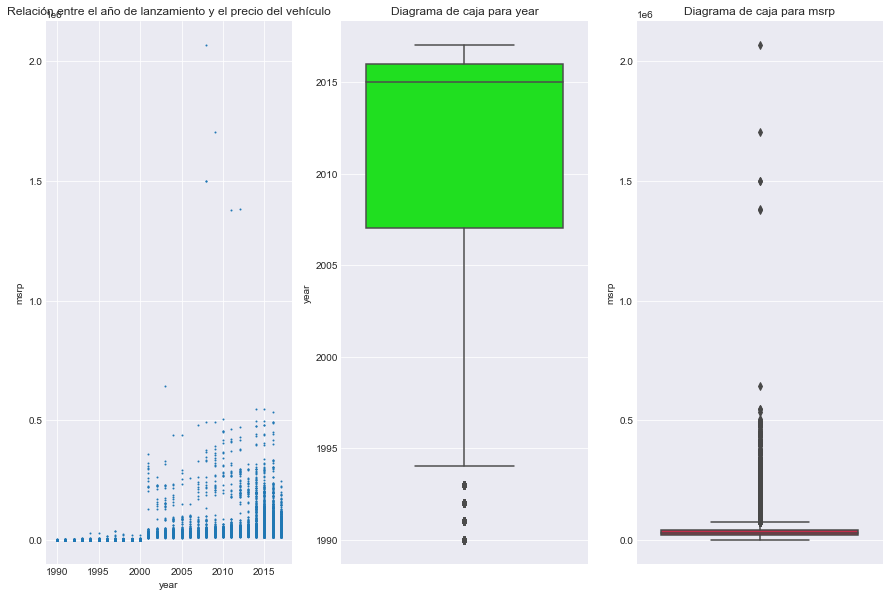

In [ ]:
fig3, ax = plt.subplots(1, 3, figsize=(15,10))
ax[0].scatter(df_clean['year'], df_clean['msrp'], s=1);
sns.boxplot(ax = ax[1], data = df_clean, y = 'year', color = 'lime');
sns.boxplot(ax = ax[2], data = df_clean, y = 'msrp', color = 'crimson');
ax[0].set_title('Relación entre el año de lanzamiento y el precio del vehículo')
ax[1].set_title('Diagrama de caja para year')
ax[2].set_title('Diagrama de caja para msrp')
ax[0].set_xlabel('year'); ax[0].set_ylabel('msrp');

Veamos los resultados de la regresión al eliminar algunos datos anómalos que se aprecian en la imagen:

In [ ]:
df_year = df_clean.copy()

print("Old Shape: ", df_year.shape)
 
outliers(df_year, 'year')
outliers(df_year, 'msrp')
 
print("New Shape: ", df_year.shape)

Old Shape:  (11914, 15)
New Shape:  (11695, 15)


In [ ]:
x = df_year['year']
y = df_year['msrp']
slope, intercept, correlation, p_valor, error_std = stats.linregress(x, y)
slope = round(slope); intercept = round(intercept)
print(f'''Pendiente: {slope} \nIntercepto: {intercept} \nCoeficiente de correlación: {correlation}
P_valor: {p_valor} \nError de la pendiente: {error_std}''')

Pendiente: 1743 
Intercepto: -3470180 
Coeficiente de correlación: 0.4452943980371724
P_valor: 0.0 
Error de la pendiente: 32.41990131664292


Por lo tanto, la relación obtenida en este caso es:

\begin{equation}
    y = 1743x - 3470180
\end{equation}

y se presenta un mejor ajuste de los datos, pasando de 0.228 a 0.445 el coeficiente de correlación. Gráficamente la regresión lineal tiene la siguiente forma:

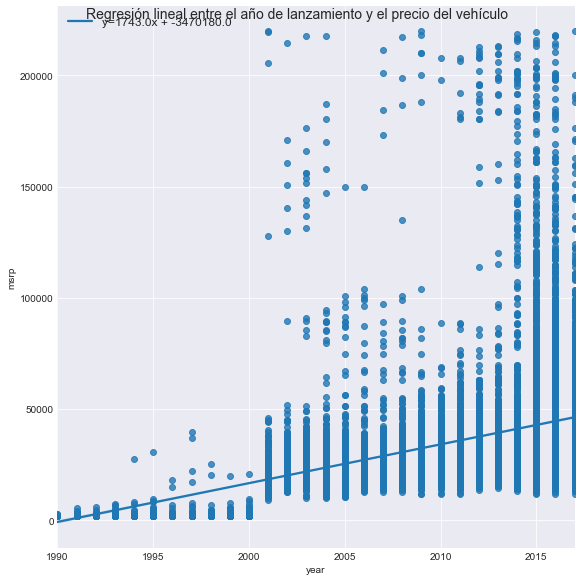

In [ ]:
sns.lmplot(x='year',y='msrp',data=df_year,line_kws={'label':"y={0:.1f}x + {1:.1f}".format(slope,intercept)},height=8)
plt.legend(fontsize = 12);
plt.suptitle('Regresión lineal entre el año de lanzamiento y el precio del vehículo', fontsize = 14);